In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline
import datetime

In [6]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col=True))
    return pd.concat(dfs)
        
week_nums = [210904, 210911, 210918,210925,210828,210821,210814,210807,210731,210724,210717,210710,210703]
turnstiles_df = get_data(week_nums)

# DATA CLEAN


In [7]:
turnstiles_df.rename(columns={'EXITS                                                               ':'EXITS'}, inplace=True)

In [8]:
turnstiles_df.describe()

,ENTRIES,EXITS
count,2.724418e+06,2.724418e+06
mean,4.148078e+07,3.317211e+07
std,2.181339e+08,1.916161e+08
min,0.000000e+00,0.000000e+00
25%,2.198380e+05,1.027980e+05
50%,1.396824e+06,8.526620e+05
75%,5.997710e+06,3.971601e+06
max,2.147407e+09,2.133797e+09


In [9]:
turnstiles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2724418 entries, 0 to 209829
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   DATE_TIME  datetime64[ns]
 1   C/A        object        
 2   UNIT       object        
 3   SCP        object        
 4   STATION    object        
 5   LINENAME   object        
 6   DIVISION   object        
 7   DATE       object        
 8   TIME       object        
 9   DESC       object        
 10  ENTRIES    int64         
 11  EXITS      int64         
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 270.2+ MB


In [10]:
turnstiles_df.dtypes

DATE_TIME    datetime64[ns]
C/A                  object
UNIT                 object
SCP                  object
STATION              object
LINENAME             object
DIVISION             object
DATE                 object
TIME                 object
DESC                 object
ENTRIES               int64
EXITS                 int64
dtype: object

# DATA NULL

In [11]:
turnstiles_df.isna().sum()

DATE_TIME    0
C/A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
dtype: int64

In [12]:
turnstiles_df.DATE.value_counts().sort_index()

06/26/2021    29965
06/27/2021    29840
06/28/2021    29814
06/29/2021    29843
06/30/2021    29883
              ...  
09/20/2021    30444
09/21/2021    30082
09/22/2021    30014
09/23/2021    30033
09/24/2021    29899
Name: DATE, Length: 91, dtype: int64

# SUB DATA

In [13]:
df_sub= turnstiles_df[['C/A' ,'STATION','DATE','TIME','ENTRIES','EXITS']]
df_sub

,C/A,STATION,DATE,TIME,ENTRIES,EXITS
0,A002,59 ST,08/28/2021,00:00:00,7625998,2609113
1,A002,59 ST,08/28/2021,04:00:00,7626014,2609117
2,A002,59 ST,08/28/2021,08:00:00,7626024,2609135
3,A002,59 ST,08/28/2021,12:00:00,7626086,2609191
4,A002,59 ST,08/28/2021,16:00:00,7626206,2609221
...,...,...,...,...,...,...
209825,TRAM2,RIT-ROOSEVELT,07/02/2021,05:00:00,5554,585
209826,TRAM2,RIT-ROOSEVELT,07/02/2021,09:00:00,5554,585
209827,TRAM2,RIT-ROOSEVELT,07/02/2021,13:00:00,5554,585
209828,TRAM2,RIT-ROOSEVELT,07/02/2021,17:00:00,5554,585


In [14]:
0 in df_sub.EXITS

True

# DATA DUBLICAT

# Remove DATA DUBLICAT

In [15]:
dub = turnstiles_df.duplicated()
print(" number of dublicate row= %d"% (dub.sum()))

 number of dublicate row= 0


In [16]:
print('number of rows  before discarding duplicates = %d' % (df_sub.shape[0]))
datadub=df_sub.drop_duplicates()
print("number of rows after discarding duplicates = %d" % (datadub.shape[0]))

number of rows  before discarding duplicates = 2724418
number of rows after discarding duplicates = 2724408


In [17]:
dub = df_sub.duplicated()
print(" number of dublicate row= %d"% (dub.sum()))

 number of dublicate row= 10


# FIND THE PEAK TIME

In [18]:
Morning_Peak=df_sub[(df_sub.TIME == '08:00:00') | (df_sub.TIME == '12:00:00')]

In [19]:
Morning_Peak

,C/A,STATION,DATE,TIME,ENTRIES,EXITS
2,A002,59 ST,08/28/2021,08:00:00,7626024,2609135
3,A002,59 ST,08/28/2021,12:00:00,7626086,2609191
8,A002,59 ST,08/29/2021,08:00:00,7626464,2609272
9,A002,59 ST,08/29/2021,12:00:00,7626508,2609309
14,A002,59 ST,08/30/2021,08:00:00,7626832,2609438
...,...,...,...,...,...,...
209101,S101A,ST. GEORGE,06/30/2021,12:00:00,793,0
209106,S101A,ST. GEORGE,07/01/2021,08:00:00,793,0
209107,S101A,ST. GEORGE,07/01/2021,12:00:00,793,0
209112,S101A,ST. GEORGE,07/02/2021,08:00:00,794,0


In [20]:
M_P=Morning_Peak.loc[Morning_Peak['C/A'] == 'S101A'].head(10)

In [21]:
M_P

,C/A,STATION,DATE,TIME,ENTRIES,EXITS
208597,S101A,ST. GEORGE,08/28/2021,08:00:00,2851869,23470
208598,S101A,ST. GEORGE,08/28/2021,12:00:00,2851871,23470
208603,S101A,ST. GEORGE,08/29/2021,08:00:00,2851881,23470
208604,S101A,ST. GEORGE,08/29/2021,12:00:00,2851881,23470
208609,S101A,ST. GEORGE,08/30/2021,08:00:00,2851893,23470
208610,S101A,ST. GEORGE,08/30/2021,12:00:00,2851900,23470
208615,S101A,ST. GEORGE,08/31/2021,08:00:00,2851930,23470
208616,S101A,ST. GEORGE,08/31/2021,12:00:00,2851936,23470
208621,S101A,ST. GEORGE,09/01/2021,08:00:00,2852003,23470
208622,S101A,ST. GEORGE,09/01/2021,12:00:00,2852006,23470


<AxesSubplot:xlabel='DATE', ylabel='ENTRIES'>

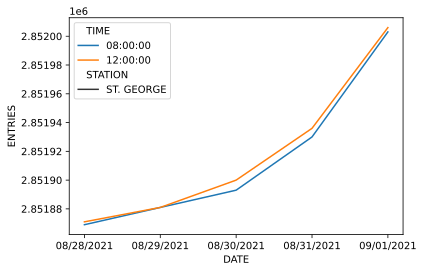

In [22]:
import seaborn as sns
sns.lineplot(
    data=M_P, x="DATE", y="ENTRIES", hue="TIME", style="STATION",
)

In [23]:
PEAKMAX=df_sub[(df_sub.TIME == '08:00:00') | (df_sub.TIME == '12:00:00')].max()
PEAKMAX

C/A                  S101A
STATION    WORLD TRADE CTR
DATE            09/24/2021
TIME              12:00:00
ENTRIES         2116141857
EXITS           2062006047
dtype: object

In [24]:
PEAK2=df_sub[(df_sub.TIME == '16:00:00') | (df_sub.TIME == '20:00:00')]
PEAK2

,C/A,STATION,DATE,TIME,ENTRIES,EXITS
4,A002,59 ST,08/28/2021,16:00:00,7626206,2609221
5,A002,59 ST,08/28/2021,20:00:00,7626348,2609238
10,A002,59 ST,08/29/2021,16:00:00,7626627,2609361
11,A002,59 ST,08/29/2021,20:00:00,7626773,2609386
16,A002,59 ST,08/30/2021,16:00:00,7627063,2609591
...,...,...,...,...,...,...
209103,S101A,ST. GEORGE,06/30/2021,20:00:00,793,0
209108,S101A,ST. GEORGE,07/01/2021,16:00:00,794,0
209109,S101A,ST. GEORGE,07/01/2021,20:00:00,794,0
209114,S101A,ST. GEORGE,07/02/2021,16:00:00,794,0


In [25]:
P=PEAK2.loc[PEAK2['C/A'] == 'S101A'].head(10)

In [26]:
P

,C/A,STATION,DATE,TIME,ENTRIES,EXITS
208599,S101A,ST. GEORGE,08/28/2021,16:00:00,2851873,23470
208600,S101A,ST. GEORGE,08/28/2021,20:00:00,2851877,23470
208605,S101A,ST. GEORGE,08/29/2021,16:00:00,2851882,23470
208606,S101A,ST. GEORGE,08/29/2021,20:00:00,2851883,23470
208611,S101A,ST. GEORGE,08/30/2021,16:00:00,2851916,23470
208612,S101A,ST. GEORGE,08/30/2021,20:00:00,2851926,23470
208617,S101A,ST. GEORGE,08/31/2021,16:00:00,2851945,23470
208618,S101A,ST. GEORGE,08/31/2021,20:00:00,2851994,23470
208623,S101A,ST. GEORGE,09/01/2021,16:00:00,2852015,23470
208624,S101A,ST. GEORGE,09/01/2021,20:00:00,2852025,23470


<AxesSubplot:xlabel='DATE', ylabel='ENTRIES'>

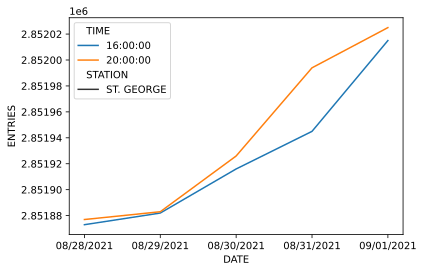

In [27]:
import seaborn as sns
sns.lineplot(
    data=P, x="DATE", y="ENTRIES", hue="TIME", style="STATION",
)

In [28]:
PEAKMAX=df_sub[(df_sub.TIME == '16:00:00') | (df_sub.TIME == '20:00:00')].max()
PEAKMAX

C/A                  S101A
STATION    WORLD TRADE CTR
DATE            09/24/2021
TIME              20:00:00
ENTRIES         2116142103
EXITS           2133796536
dtype: object

# TOP 5 STATION

In [29]:
Top_5_station = df_sub.groupby('STATION').sum()\
    .sort_values(['ENTRIES'] ,ascending=(False))\
    .reset_index().head()

In [30]:
Top_5_station #mTimes Square
#served by the 4 and 6 trains at all times, the 5 train at all times except late nights, and the <6> train during weekdays in peak direction. This station was- 
#23rd Street station
#Pennsylvania Station serving more than 00,000 passengers per 3 months

,STATION,ENTRIES,EXITS
0,42 ST-PORT AUTH,4134990852793,3421960618606
1,125 ST,3679662075820,3024334254688
2,DEKALB AV,3563200214413,2385075470535
3,23 ST,3137023747012,3162269014423
4,34 ST-PENN STA,2549184821545,2821828549965


# STATION TOTAL

In [31]:
station_totals = df_sub.groupby(['STATION', 'TIME']).agg({
     'ENTRIES': 'sum',
     'EXITS': 'sum'
     
 })

In [32]:
station_totals

ENTRIES        EXITS
STATION   TIME                              
1 AV      00:00:00  42196733931  42628445936
          04:00:00  42196759056  42628497300
          08:00:00  42196797327  42628631038
          08:12:05      2244008      3134399
          08:42:30      4421765     19044620
...                         ...          ...
ZEREGA AV 05:00:00    263434136    180864608
          09:00:00    263466640    180881343
          13:00:00    263482912    180896109
          17:00:00    263502340    180923208
          21:00:00    263513493    180955644

[87032 rows x 2 columns]

In [33]:
stations_result_Entry= pd.pivot_table(Top_5_station, values='ENTRIES',
                    columns=['STATION'], aggfunc=np.sum)

In [34]:
stations_result_Entry.head()

STATION,125 ST,23 ST,34 ST-PENN STA,42 ST-PORT AUTH,DEKALB AV
ENTRIES,3679662075820,3137023747012,2549184821545,4134990852793,3563200214413


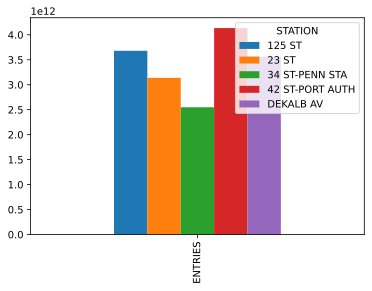

In [35]:
stations_result_Entry.plot.bar(stacked=False);

In [36]:
stations_result_EXITS= pd.pivot_table(Top_5_station, values='EXITS', 
                    columns=['STATION'], aggfunc=np.sum)

In [37]:
stations_result_EXITS.head()

STATION,125 ST,23 ST,34 ST-PENN STA,42 ST-PORT AUTH,DEKALB AV
EXITS,3024334254688,3162269014423,2821828549965,3421960618606,2385075470535


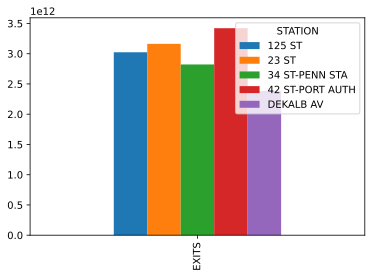

In [38]:
stations_result_EXITS.plot.bar(stacked=False);